Полезные ссылки 
-

https://habr.com/ru/articles/704608/ (Шпаргалка для подготовки к экзамену по машинному обучению)

https://habr.com/ru/companies/nix/articles/425253/ (решение задачи прогнозирования)

https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27 (очистка данных)

https://skine.ru/articles/243050/ (Этапы предварительной обработки данных в Python для любого алгоритма машинного обучения)

https://skine.ru/articles/204235/ (Машинное обучение и дисбаланс в классе)

https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv (автоматический подбор параметров модели машинного обучения)

https://www.numpyninja.com/post/nlp-text-data-visualization (NLP: Text Data Visualization)

https://proglib.io/p/nlp-i-vizualizaciya-teksta-na-primere-tvitov-o-prezidentskih-vyborah-v-ssha-2021-06-10 ( NLP и визуализация текста на примере твитов о президентских выборах в США)

Подготовка данных
-

1. Предварительный анализ. Нужно исследовать данные - посмотреть распределения признаков, наличие выбросов и пропущенных значений, взаимосвязи между признаками.
2. Очистка данных. Удаление дубликатов, выбросов, заполнение пропусков, исправление ошибок. 
3. Преобразование признаков. Масштабирование, нормализация, дискретизация, разложение на компоненты, построение новых признаков.
4. Разбиение данных. Разделяем выборку на обучающую, валидационную и тестовую для правильной оценки модели.

Подготовка данных может отличаться для разных задач:

1) Для задач классификации важно сбалансировать классы, иначе модель будет смещена в сторону доминирующего класса.
2) В задачах прогнозирования обычно применяется нормализация временных рядов, чтобы устранить тренды и сезонность.
3) Для кластеризации все признаки желательно преобразовать к единому масштабу, например, нормализовать.

Возьмем датасет и проведем предобработку

In [268]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split

In [269]:
data = pd.read_csv("datasets/carprice.csv") # читаем наш csv-файл
df = pd.DataFrame(data) # преобразуем его в датафрейм
df # выведем несколько строк датасета

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


Посмотрим общую статистику датасета
-------------------------

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Посчитаем дубликаты
-

In [271]:
df.duplicated().sum()

313

In [272]:
# удаляем все дубликаты из датасета
df.drop_duplicates(inplace= True)

Приведем столбцы в правильный вид
------------------------------

In [273]:
df=df.drop(['ID'],axis=1)

Заметим в столбце Levy "-". Этот символ обозначает отсутствие значения в строке. Модель при обучении такого не поймет. Могут встретиться также другие символы вместо пропуска, так что глазами лучше просмотреть свой датасет на всякий случай.
- Чтобы мы смоги в будущем обнаружить пропуски, нужно "-" (или другой символ/слово, означающее пропуск) заменить на NaN.

In [274]:
df['Levy'].replace({'-':np.nan}, inplace = True) 
# ['Levy'] - столбец, в котором нужно что-то заменить (levy заменить на свой). {'-':np.nan} - '-' заменить на свое, если у тебя другим обозначен пропуск

Также заметим, что df.info() стобец Levy посчитало типом object (символ, слово), хотя он числовой . Изменим это.

In [275]:
df['Levy'] = df['Levy'].astype('float64') 
# присваиваем нужному столбцу нужный тип, 'Levy' замени на свой. Тип тоже на свой: int64, float64 и тд (погуглить другие если надо)

In [276]:
# если в каком-то столбце есть значения Yes, No их нужно поменять на True, False или 1 и 0, иначе модель их не поймёт при обучении
df['Leather interior'].replace({'Yes': True, 'No': False}, inplace=True) # в нашем случае это коснулось столбца Leather interior (замените на свой если надо)

В столбце Engine volume встречаются значения в числовом виде, а также числа с припиской Turbo. Модель при обучении такого тоже не поймёт. Нужно отделять цифры от текста. 

In [277]:
# для удобства поиска значений с припиской Turbo приведем в столбце Engine volume всё к нижнему регистру
df['Engine volume'] = df['Engine volume'].str.lower()

# Создадим новый столбец Turbo, в который будут заноситься значения из столбца Engine volume, содержащие приписку turbo
df['Turbo'] = df['Engine volume'].str.contains('turbo')
# То есть по итогу добавится столбец Turbo, и если у автомобиля есть турбонадув, то будет стоять True, если нет - False

# Обрезаем данные в столбце Engine volume
# Например, если исходное значение было '3.6 л', то обрезанное значение будет просто '3.6'.
df['Engine volume'] = df['Engine volume'].str.slice(0,3)

# меняем тип данных в столбце Engine volume на числовой
df['Engine volume'] = df['Engine volume'].astype('float64')

In [278]:
# смотрим что вышло, выводим измененный столбец Engine volume
df['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18924, dtype: float64

In [279]:
# выведем наш новый столбец Turbo
df['Turbo']

0        False
1        False
2        False
3        False
4        False
         ...  
19232     True
19233    False
19234    False
19235    False
19236    False
Name: Turbo, Length: 18924, dtype: bool

По аналогии обрежем данные в столбце Mileage, избавлясь от приписки km и делая столбец числовым

In [280]:
df['Mileage'] = df['Mileage'].str.strip('km')
df['Mileage'] = df['Mileage'].astype('int64')

In [281]:
# смотрим изменения в датасете
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,True,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,True
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,True,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,False
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,True,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,False
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,True,Diesel,2.0,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,False


Столбец Prod. year тоже не несет полезной информации. Его можно либо удалить, либо пересчитать и сделать его столбцом - Age (Возраст)

In [282]:
dtime = dt.datetime.now()
df['Age']=dtime.year - df['Prod. year']

df = df.drop('Prod. year',axis=1)

In [283]:
# ищем уникальные значения в столбце Doors (их 3)
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [284]:
# заменим их на числовые значения
df['Doors'].replace({'04-May':4, '02-Mar': 2, '>5':5}, inplace = True)
df['Doors'] = df['Doors'].astype('int64')

In [285]:
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
0,13328,1399.0,LEXUS,RX 450,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False,13
1,16621,1018.0,CHEVROLET,Equinox,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False,12
2,8467,NaN,HONDA,FIT,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False,17
3,3607,862.0,FORD,Escape,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False,12
4,11726,446.0,HONDA,FIT,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,MERCEDES-BENZ,CLK 200,Coupe,True,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,True,24
19233,15681,831.0,HYUNDAI,Sonata,Sedan,True,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,False,12
19234,26108,836.0,HYUNDAI,Tucson,Jeep,True,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,False,13
19235,5331,1288.0,CHEVROLET,Captiva,Jeep,True,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4,False,16


Работа с пропусками
-

In [286]:
# заново применим df.isna().sum() и увидим пропуски
df.isna().sum()

Price                  0
Levy                5709
Manufacturer           0
Model                  0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Turbo                  0
Age                    0
dtype: int64

<AxesSubplot: >

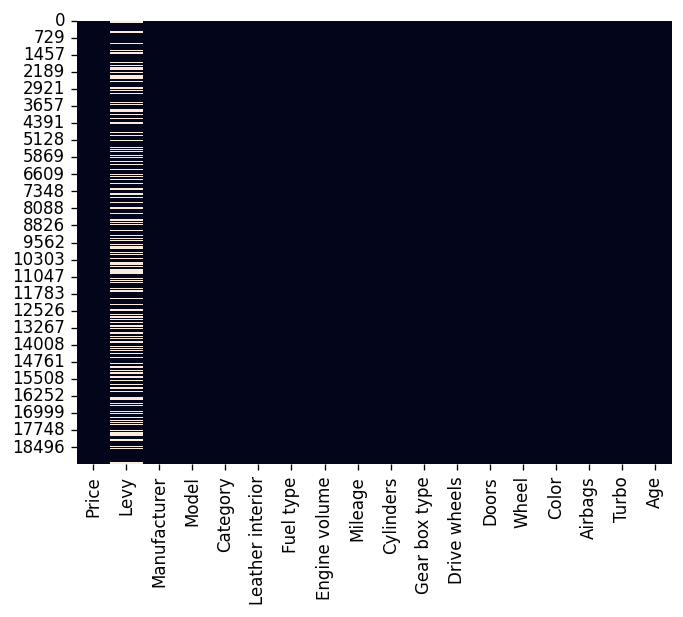

In [287]:
plt.figure(dpi=120)
sns.heatmap(df.isna(),cbar=False)

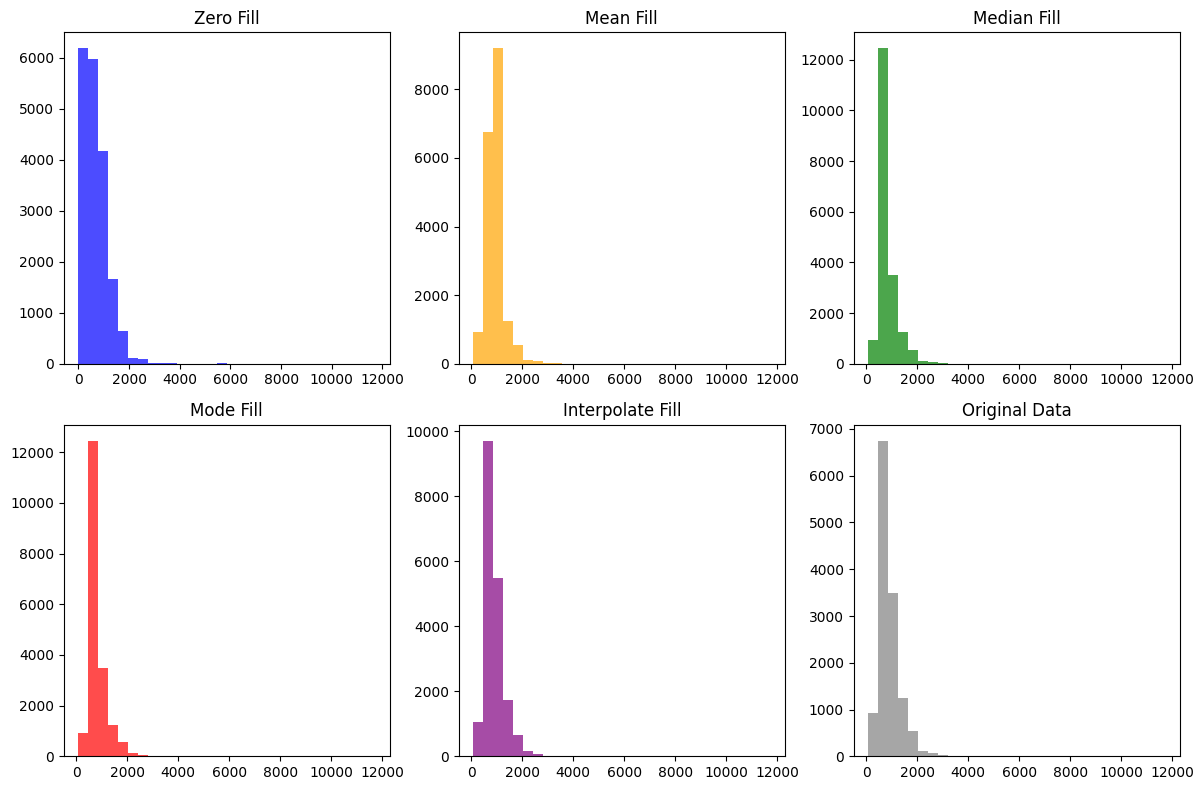

In [288]:
# Копируем исходные данные для сравнения
df_copy = df.copy()

# Заполняем пропуски разными методами
df_copy['Levy_Zero'] = df_copy['Levy'].fillna(0)
df_copy['Levy_Mean'] = df_copy['Levy'].fillna(df_copy['Levy'].mean())
df_copy['Levy_Median'] = df_copy['Levy'].fillna(df_copy['Levy'].median())
df_copy['Levy_Mode'] = df_copy['Levy'].fillna(df_copy['Levy'].mode()[0])
df_copy['Levy_Interpolate'] = df_copy['Levy'].interpolate()

# Построим гистограммы для сравнения
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(df_copy['Levy_Zero'], bins=30, color='blue', alpha=0.7)
plt.title('Zero Fill')

plt.subplot(2, 3, 2)
plt.hist(df_copy['Levy_Mean'], bins=30, color='orange', alpha=0.7)
plt.title('Mean Fill')

plt.subplot(2, 3, 3)
plt.hist(df_copy['Levy_Median'], bins=30, color='green', alpha=0.7)
plt.title('Median Fill')

plt.subplot(2, 3, 4)
plt.hist(df_copy['Levy_Mode'], bins=30, color='red', alpha=0.7)
plt.title('Mode Fill')

plt.subplot(2, 3, 5)
plt.hist(df_copy['Levy_Interpolate'], bins=30, color='purple', alpha=0.7)
plt.title('Interpolate Fill')

plt.subplot(2, 3, 6)
plt.hist(df_copy['Levy'], bins=30, color='gray', alpha=0.7)
plt.title('Original Data')

plt.tight_layout()
plt.show()

Тут мы по-разному заполнили пропуски и посмотрели распределение данных в столбце Levy

Визуализируем данные
-

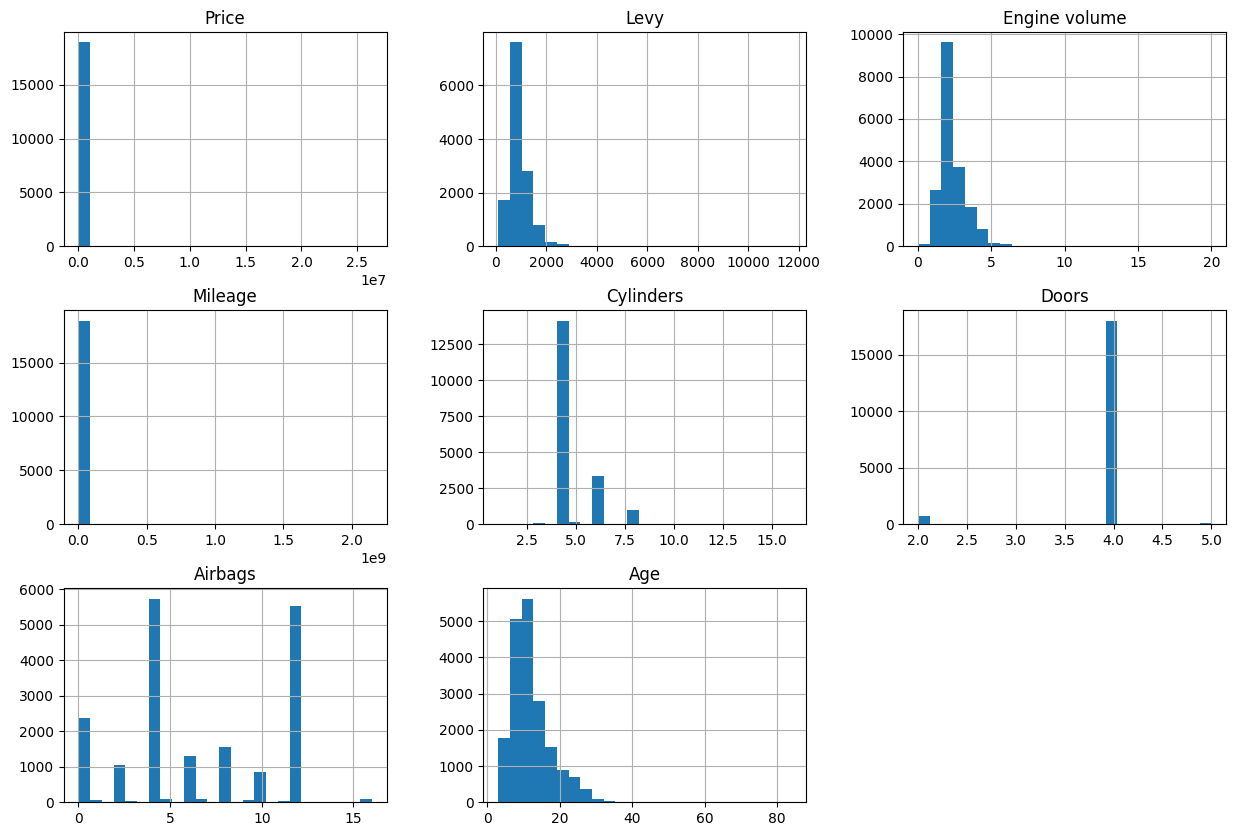

In [289]:
# диаграммы распределения числовых столбцов
df.hist(bins=25,figsize=(15,10))
plt.show()

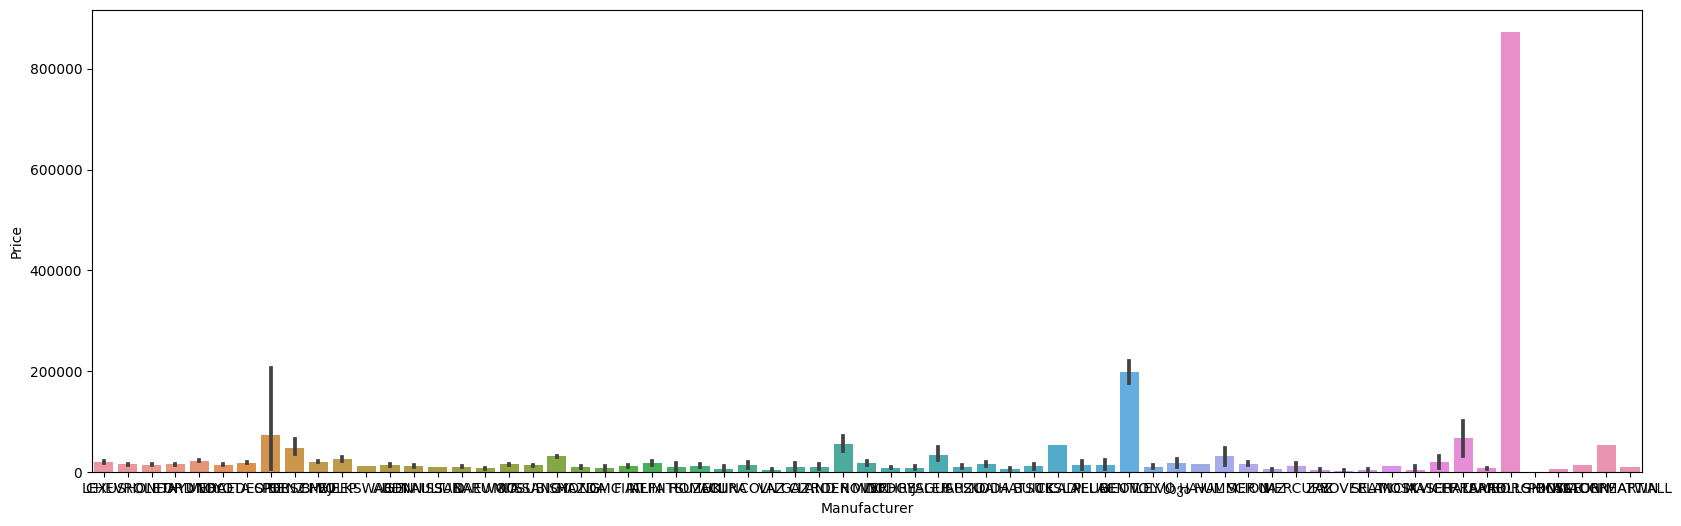

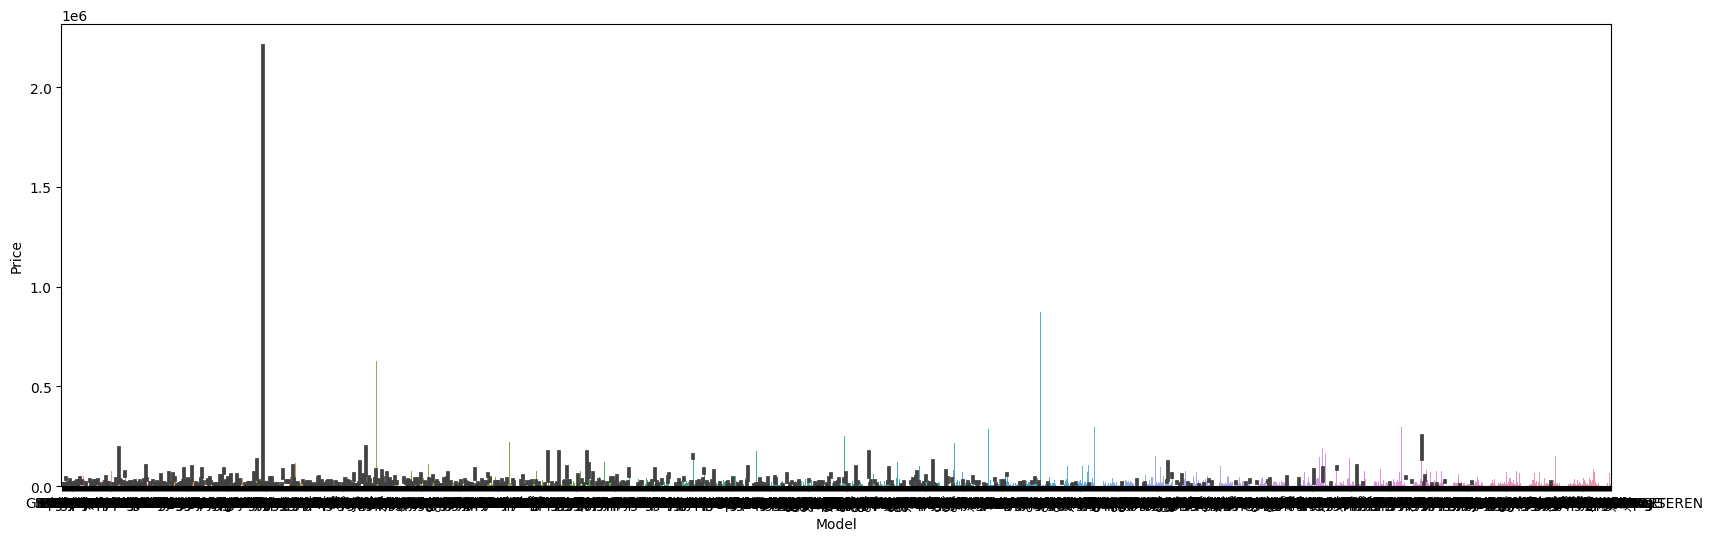

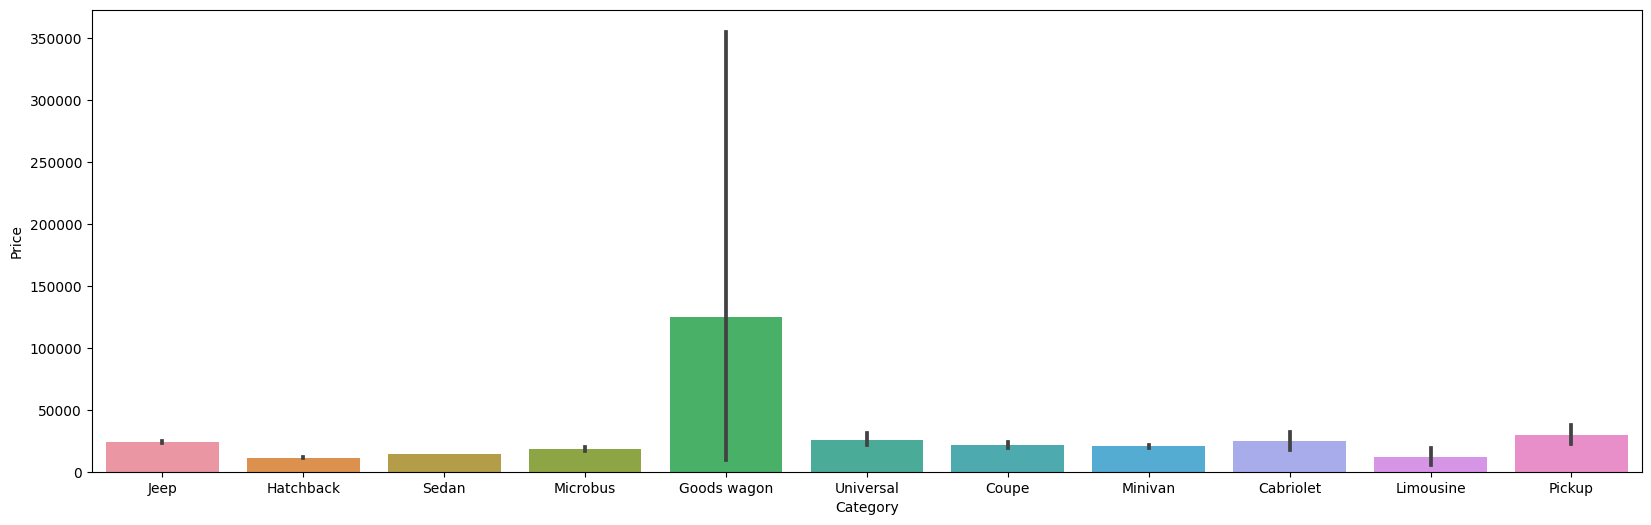

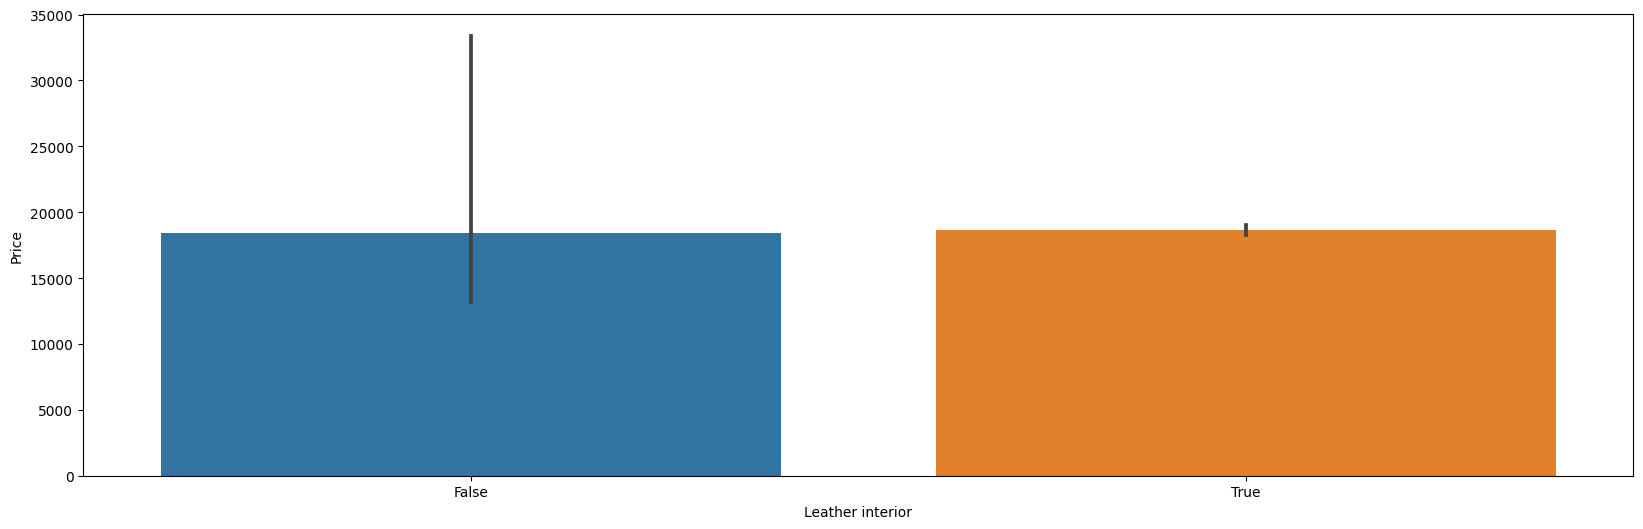

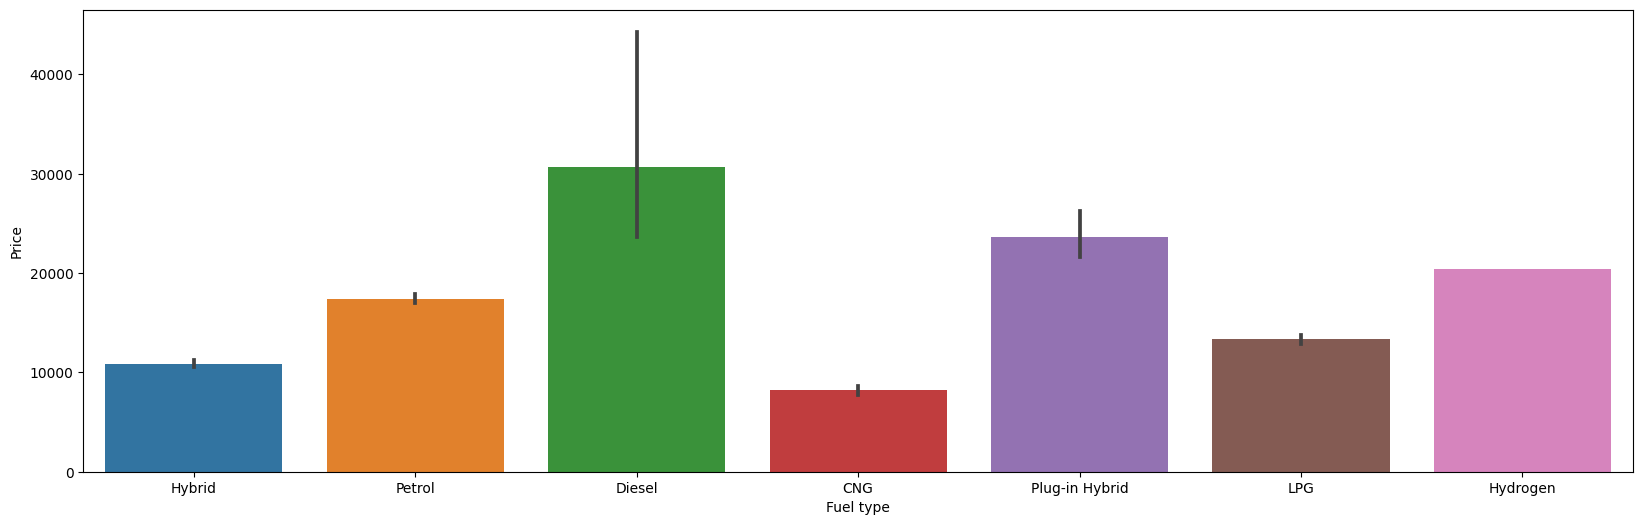

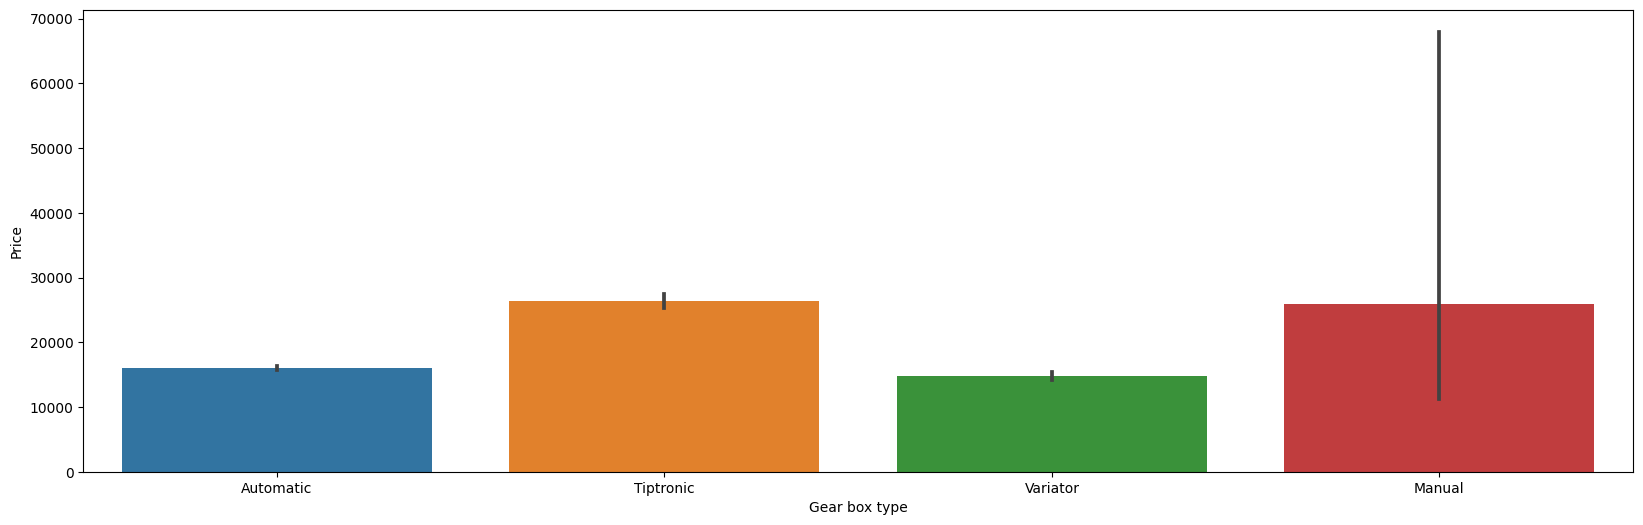

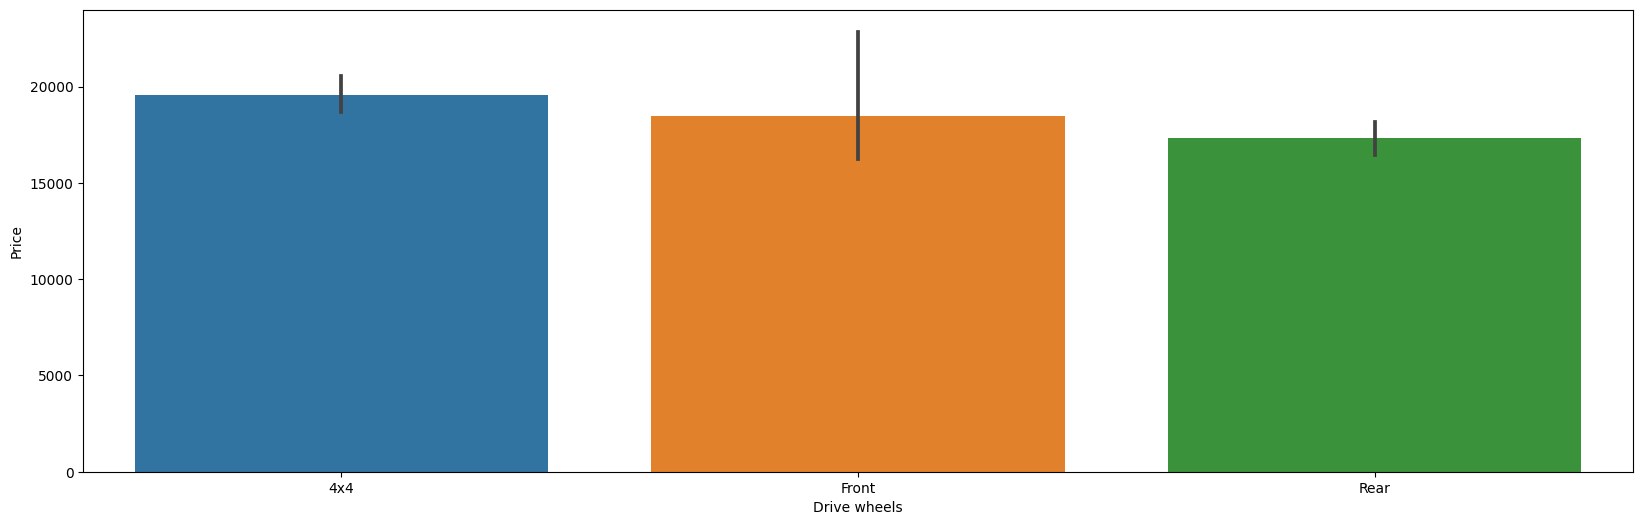

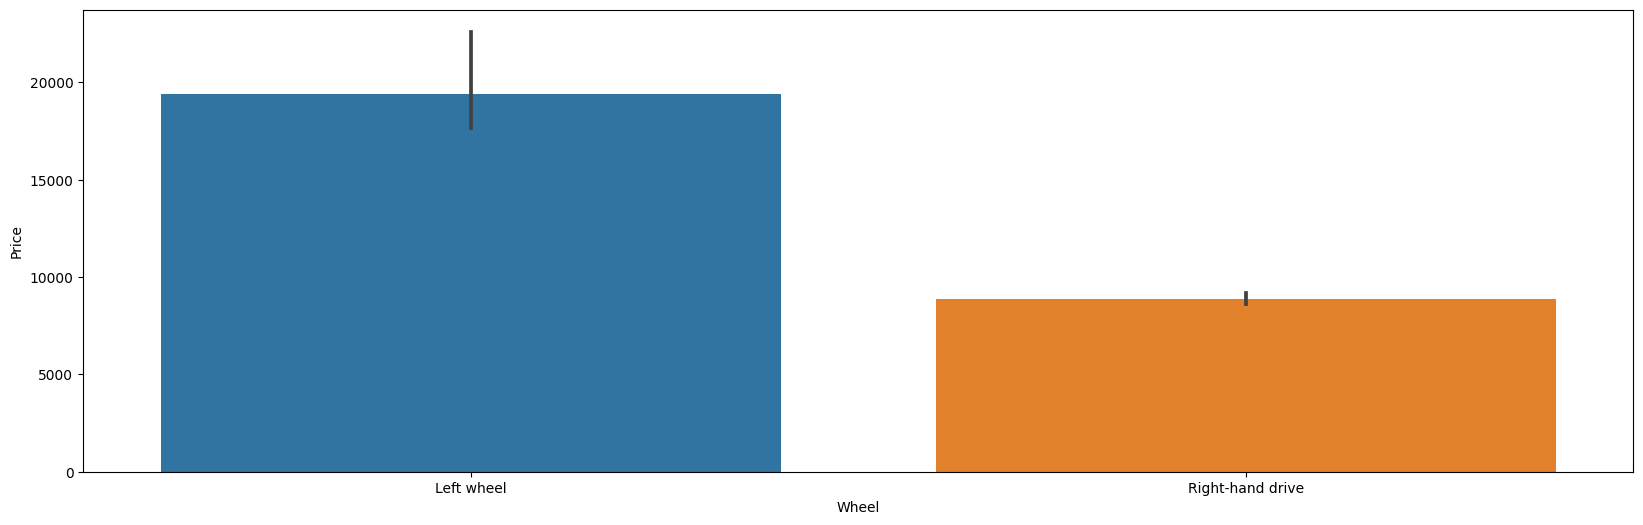

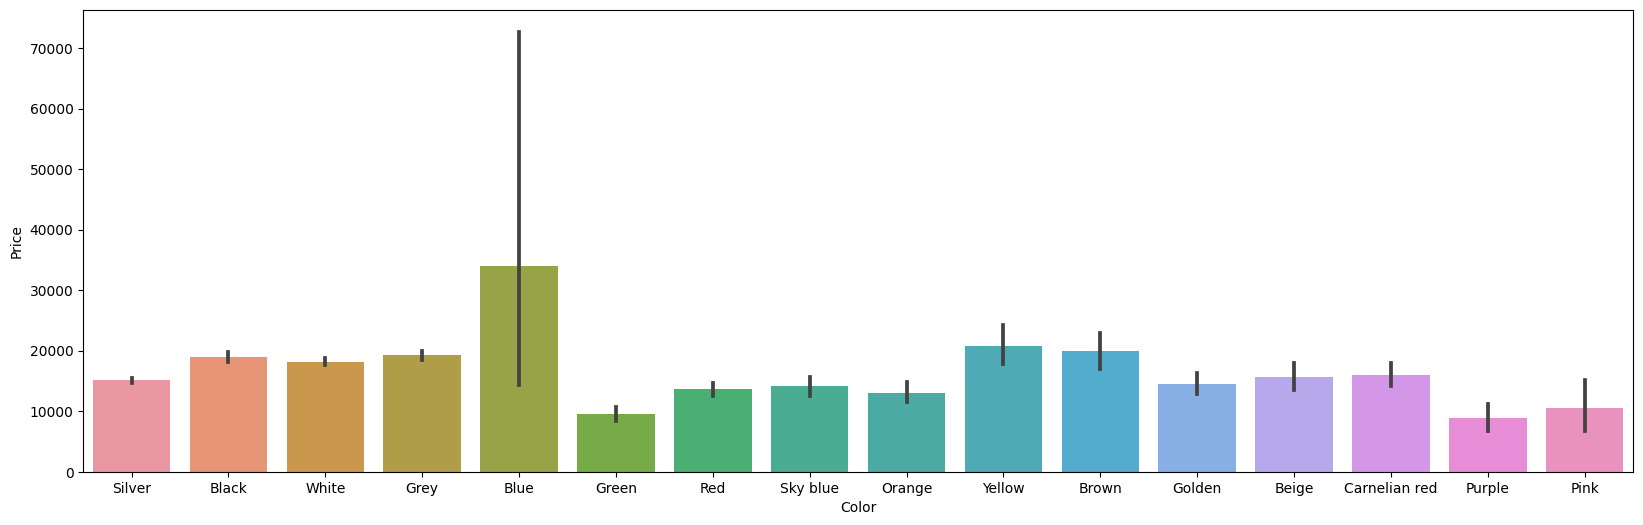

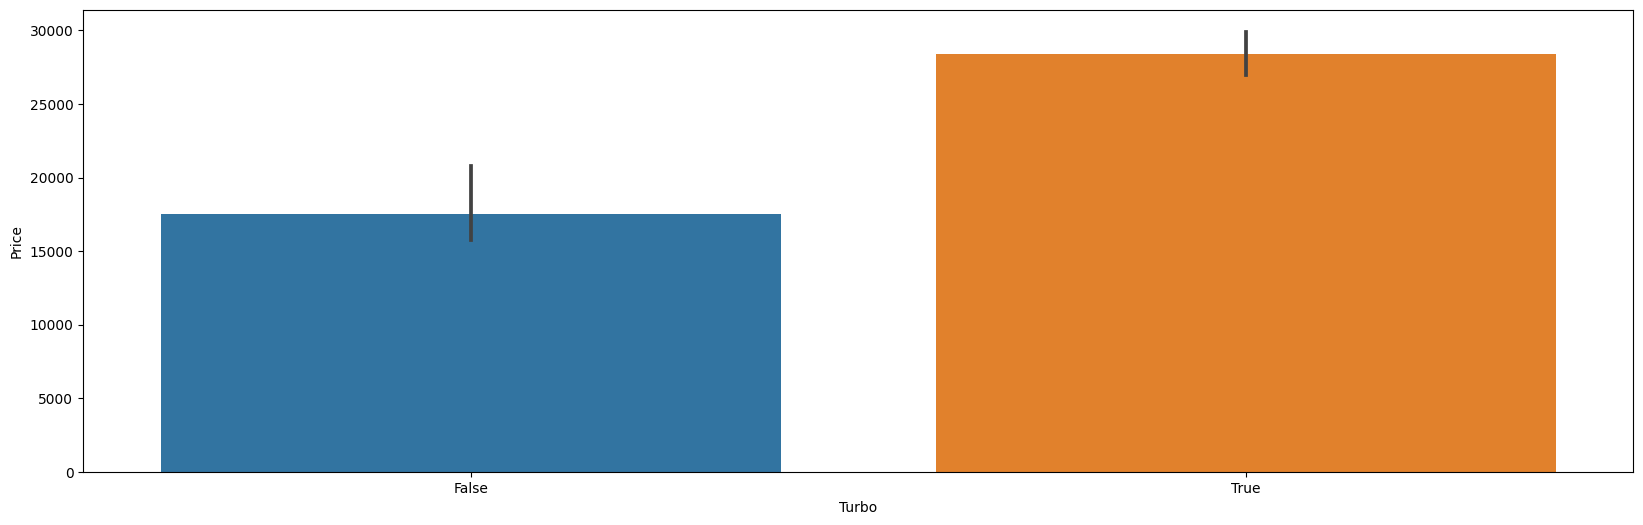

In [290]:
categorical_col = df.select_dtypes(['object', 'boolean']) # ищеи нечисловые столбцы в данных, чтобы построить по ним графики

# строим всякие графики
for col in categorical_col:
    plt.figure(figsize=(20,6))
    sns.barplot(x=df[col], y=df['Price'])


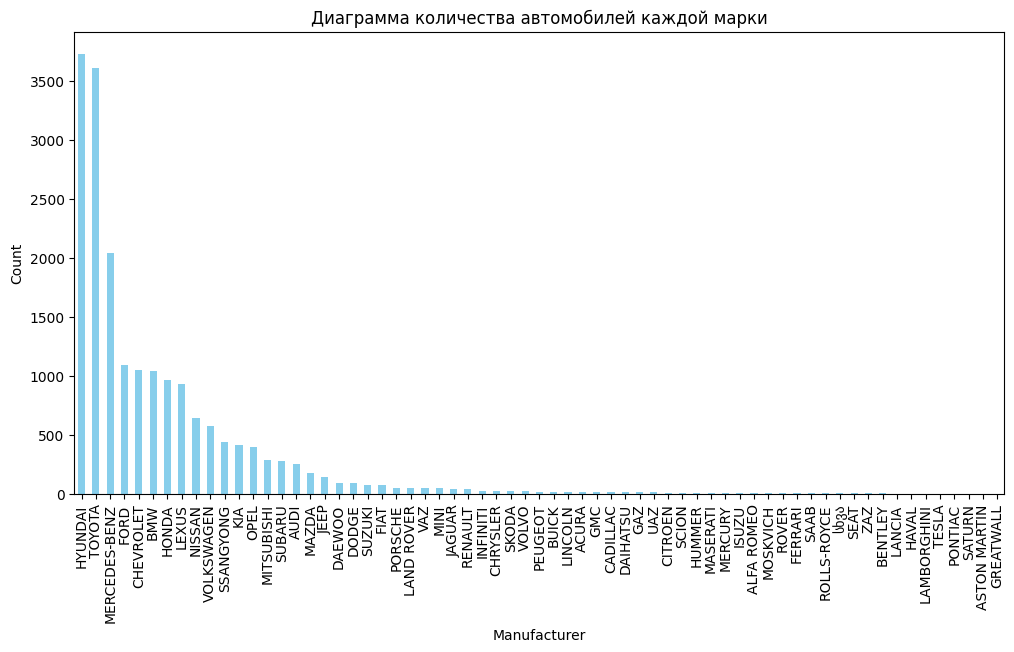

In [291]:
plt.figure(figsize=(12, 6))

manufacturer_counts = df['Manufacturer'].value_counts()
manufacturer_counts.plot(kind='bar', color='skyblue')
plt.title('Диаграмма количества автомобилей каждой марки')
plt.xlabel('Manufacturer')
plt.ylabel('Count')

plt.show()

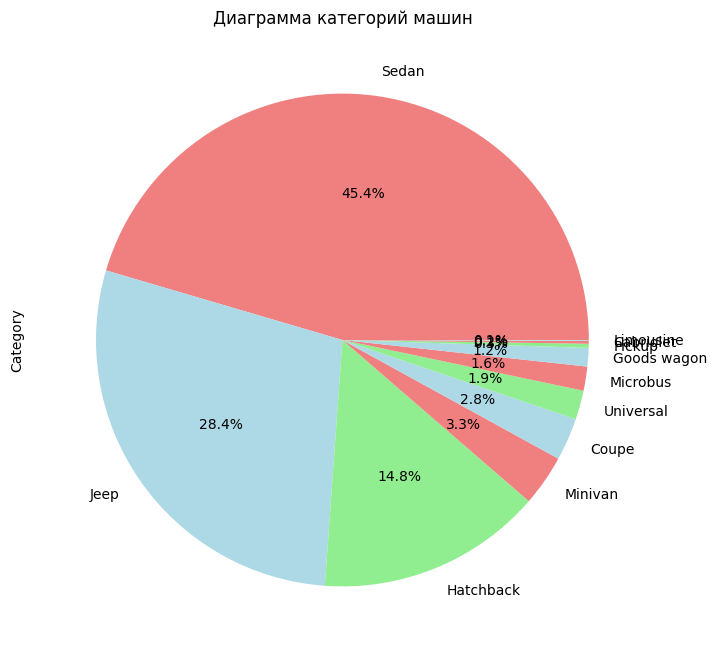

In [292]:
plt.figure(figsize=(8, 8))

category_counts = df['Category'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Диаграмма категорий машин')

plt.show()

C:\Users\pcher\AppData\Local\Temp\ipykernel_4276\119198661.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Turbo'] == True]['Airbags'], label='Turbo', shade=True)
C:\Users\pcher\AppData\Local\Temp\ipykernel_4276\119198661.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Turbo'] == False]['Airbags'], label='Non-Turbo', shade=True)


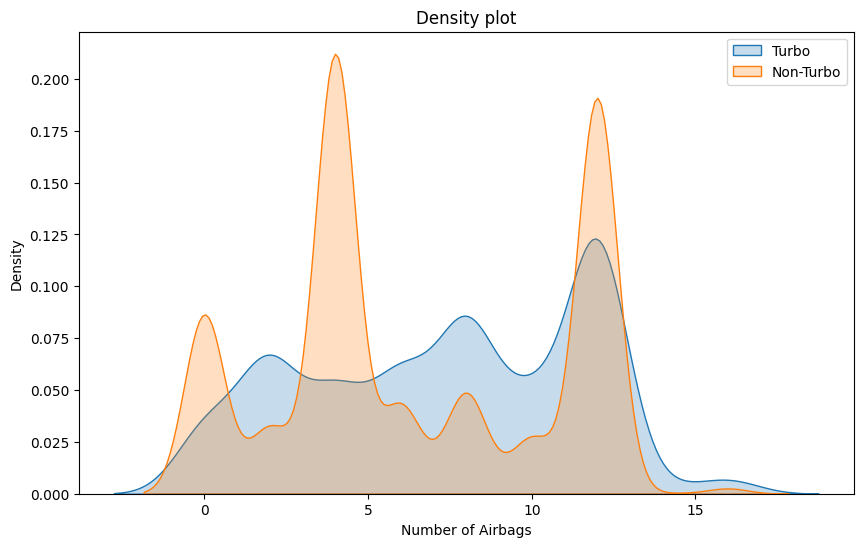

In [293]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['Turbo'] == True]['Airbags'], label='Turbo', shade=True)
sns.kdeplot(df[df['Turbo'] == False]['Airbags'], label='Non-Turbo', shade=True)

plt.title('Density plot')
plt.xlabel('Number of Airbags')
plt.ylabel('Density')
plt.legend()

plt.show()

Поиск выбросов
-

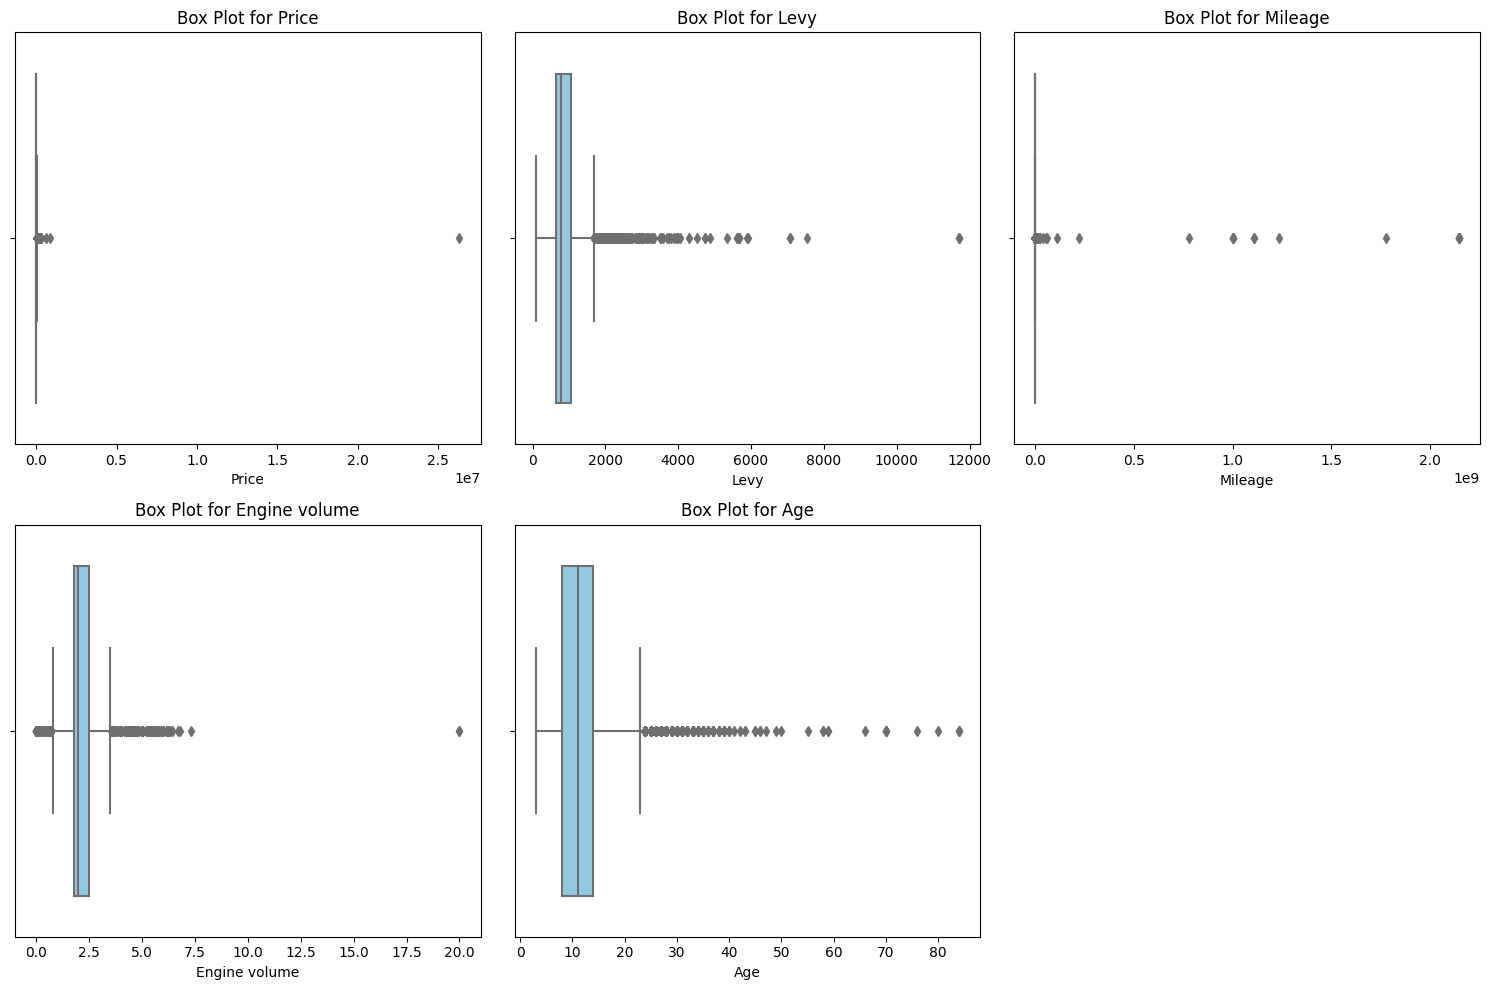

In [294]:
# Выбираем числовые столбцы для анализа выбросов
numerical_columns = ['Price', 'Levy', 'Mileage', 'Engine volume', 'Age']

# Создаем подграфики для каждого числового столбца
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    
    # Диаграмма Ящик с усами для визуализации распределения и выбросов
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Box Plot for {column}')
    
plt.tight_layout()
plt.show()

In [295]:
# Универсальный код
# Метод межквартильного размаха для выявления выбросов
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Определение нижней и верхней границ для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Столбец: {column} Нижняя граница: {lower_bound}, Верхняя граница {upper_bound}")

Столбец: Price Нижняя граница: -19767.0, Верхняя граница 47161.0
Столбец: Levy Нижняя граница: 13.0, Верхняя граница 1685.0
Столбец: Mileage Нижняя граница: -108190.25, Верхняя граница 367505.75
Столбец: Engine volume Нижняя граница: 0.7500000000000002, Верхняя граница 3.55
Столбец: Age Нижняя граница: -1.0, Верхняя граница 23.0


In [296]:
for column in numerical_columns:    
    # Подсчет и вывод количества выбросов
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Столбец: {column}, Количество выбросов: {len(outliers)}")

Столбец: Price, Количество выбросов: 18892
Столбец: Levy, Количество выбросов: 13215
Столбец: Mileage, Количество выбросов: 18207
Столбец: Engine volume, Количество выбросов: 0
Столбец: Age, Количество выбросов: 962
